In [32]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Change global plot size
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = "https://ndownloader.figshare.com/files/12948515"
# et.data.get_data(url=file_url)

# # Set working directory
# os.chdir(os.path.join(et.io.HOME, 'personal_code', 'earth_data_science_textbook', 'earth-analytics'))

# # Define relative path to file
# file_path = os.path.join("data", "earthpy-downloads",
#                          "july-2018-temperature-precip.csv")

# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_url)

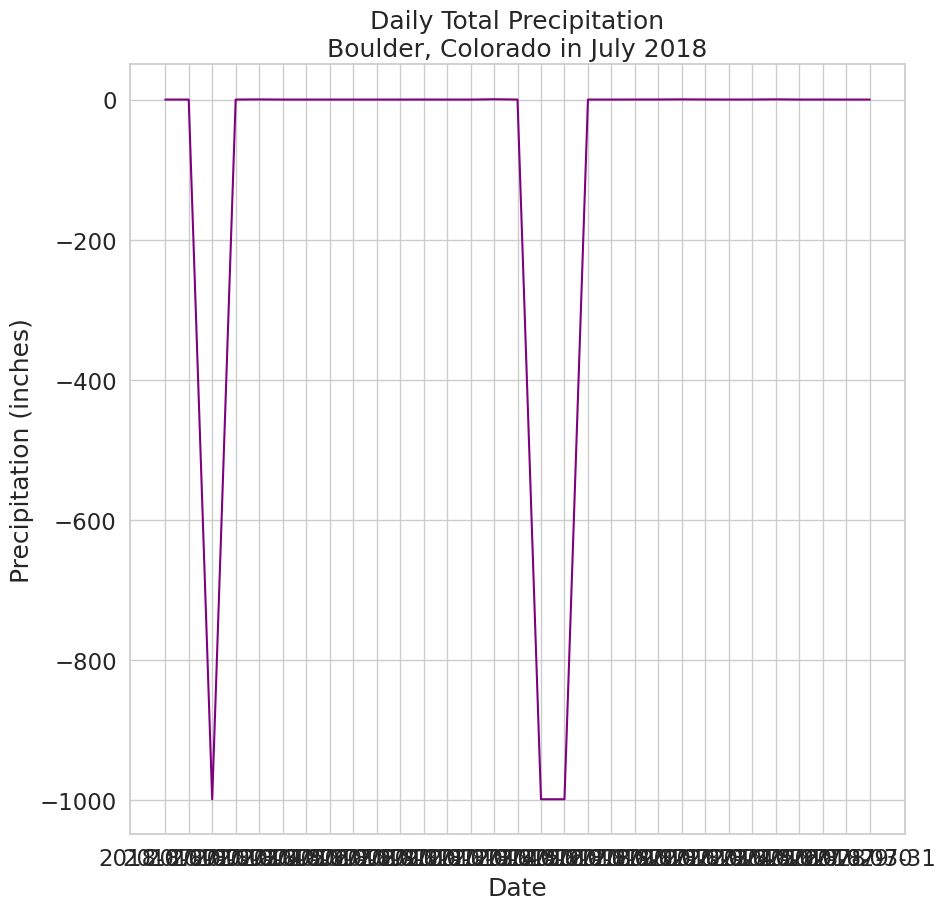

In [3]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018['date'],
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

In [4]:
file_path = "./data/boulder_july_2018.csv"
# Import data using datetime and set index to datetime
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'])

boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


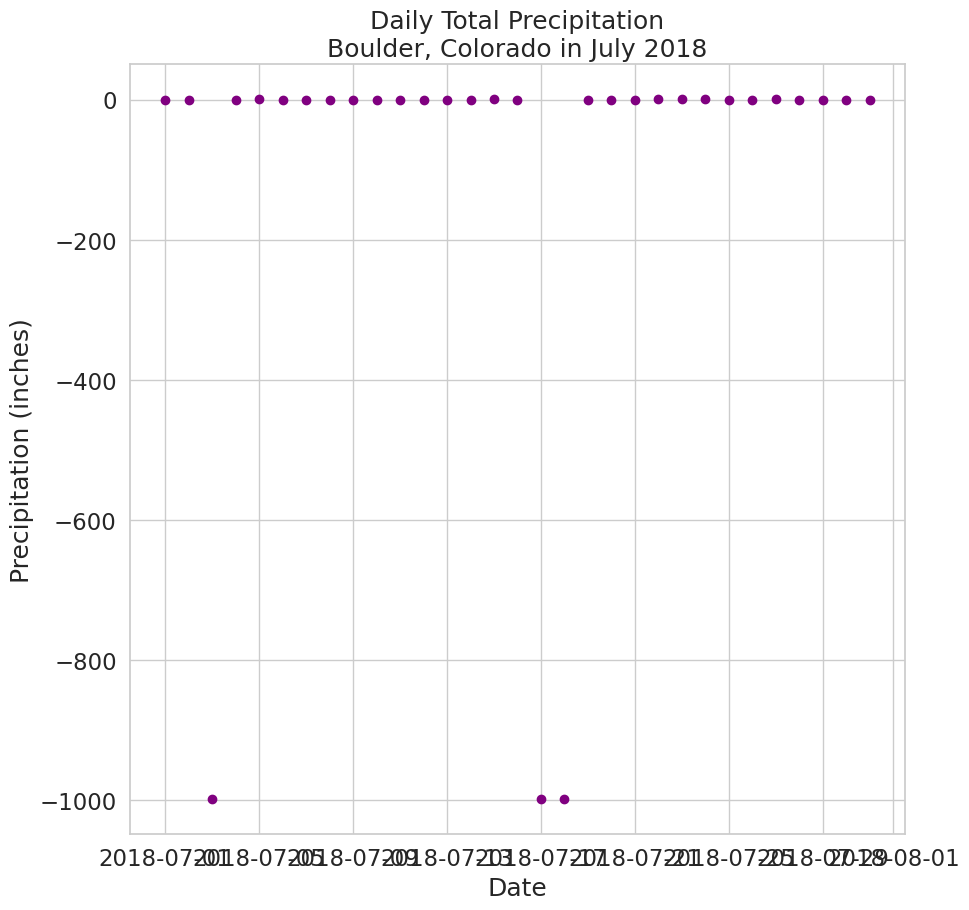

In [5]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values, # have to pass df.index.values for this to work. it is only needed for datetime indecies in bar and scatter plots.
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

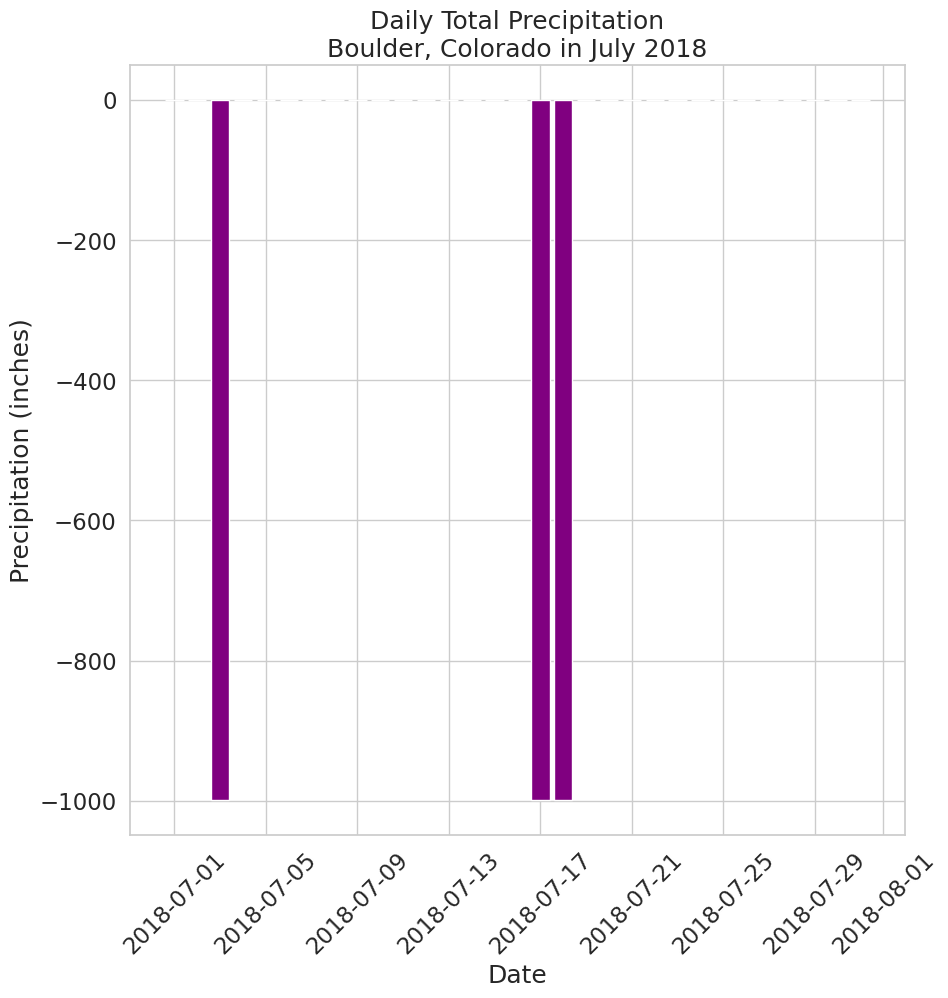

In [6]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [7]:
# Import data using datetime and no data value
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values=[-999])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


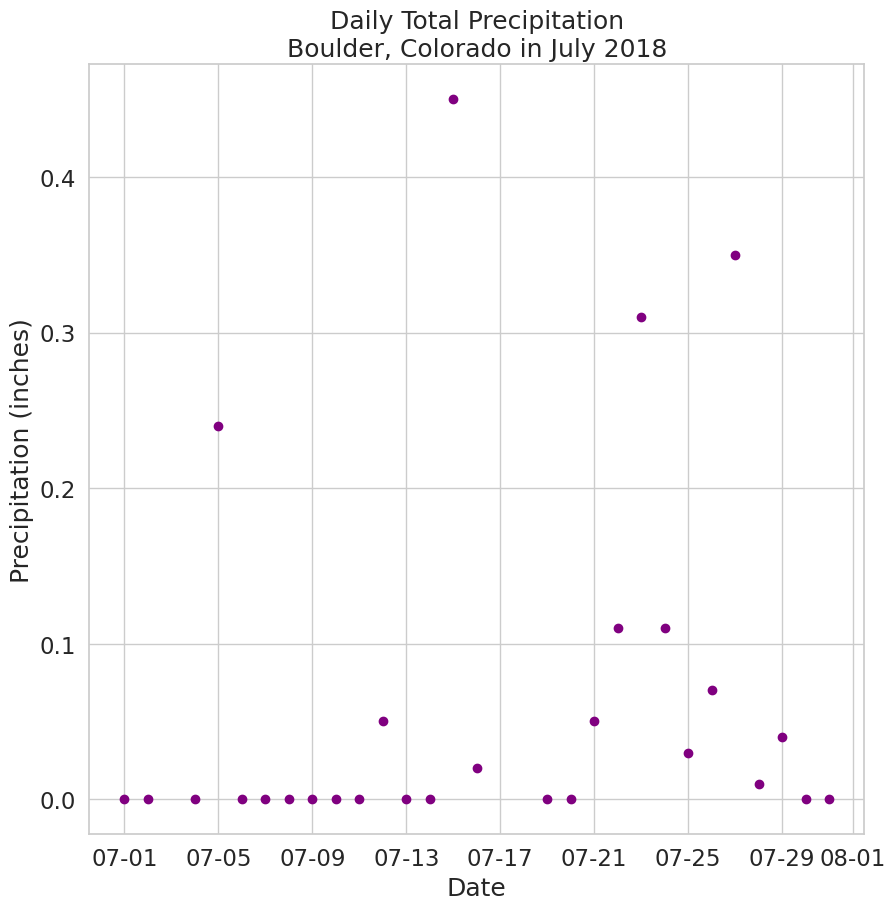

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major/minor tick for each week using (interval=1) 
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

plt.show()

plt.show()

In [27]:
# Cool filter tricks with datetimes

boulder_july_2018[boulder_july_2018.index.month == 7]
boulder_july_2018[boulder_july_2018.index.day == 7]
boulder_july_2018["2018-07-01":"2018-07-08"]

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24
2018-07-06,87,0.00
2018-07-07,96,0.00
2018-07-08,96,0.00


In [31]:
# Cool resampling/grouping trick with datetimes

boulder_july_2018.resample('M').mean() # Gives mean precip and max temp for each month

,max_temp,precip
date,,
2018-07-31,88.129032,0.065714
